In [1]:
import os
import pandas as pd

current_dir = os.getcwd()
final_path = os.path.join(current_dir, '..', 'data', 'final', 'final.csv')
selected_path = os.path.join(current_dir, '..', 'data', 'final', 'selected.csv')

final_df = pd.read_csv(final_path)
selected_df = pd.read_csv(selected_path).values

Klasyfikator będzie uczył się tylko na wyselekcjonowanych przez Random Forest atrybutach

In [2]:
from sklearn.model_selection import train_test_split
import torch

y = final_df['premium_user'].values

X_train, X_test, y_train, y_test = train_test_split(selected_df, y, test_size=0.2, random_state=42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

print(X_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([6000, 22])
torch.Size([6000, 1])


### Klasyfikator NN

Uczenie

In [3]:
import torch.nn as nn
import torch.optim as optim
from neural_network import BinaryClassifier, create_data_loader, Trainer, Evaluator

input_dim = X_train.shape[1]
clf = BinaryClassifier(input_dim)

train_loader = create_data_loader(X_train_tensor, y_train_tensor, batch_size=150)

criterion = nn.BCELoss()
optimizer = optim.Adam(clf.parameters(), lr=0.01)

trainer = Trainer(clf, criterion, optimizer)
trainer.train(train_loader, 500)


Epoch 1/500, Loss: 0.4926678538322449
Epoch 2/500, Loss: 0.4320474863052368
Epoch 3/500, Loss: 0.45980021357536316
Epoch 4/500, Loss: 0.49440786242485046
Epoch 5/500, Loss: 0.4992402195930481
Epoch 6/500, Loss: 0.4598369896411896
Epoch 7/500, Loss: 0.38928017020225525
Epoch 8/500, Loss: 0.4927520155906677
Epoch 9/500, Loss: 0.45390644669532776
Epoch 10/500, Loss: 0.4067172110080719
Epoch 11/500, Loss: 0.427181601524353
Epoch 12/500, Loss: 0.40361496806144714
Epoch 13/500, Loss: 0.43929290771484375
Epoch 14/500, Loss: 0.42322805523872375
Epoch 15/500, Loss: 0.3529055416584015
Epoch 16/500, Loss: 0.45567119121551514
Epoch 17/500, Loss: 0.392857164144516
Epoch 18/500, Loss: 0.52103590965271
Epoch 19/500, Loss: 0.49582111835479736
Epoch 20/500, Loss: 0.4484105408191681
Epoch 21/500, Loss: 0.4268699586391449
Epoch 22/500, Loss: 0.5096709132194519
Epoch 23/500, Loss: 0.3973983824253082
Epoch 24/500, Loss: 0.38618233799934387
Epoch 25/500, Loss: 0.41527998447418213
Epoch 26/500, Loss: 0.48056

Ewaluacja na zbiorze uczącym

Accuracy: 0.83
ROC AUC: 0.91
Precision: 0.89
Recall: 0.70
F1 Score: 0.78


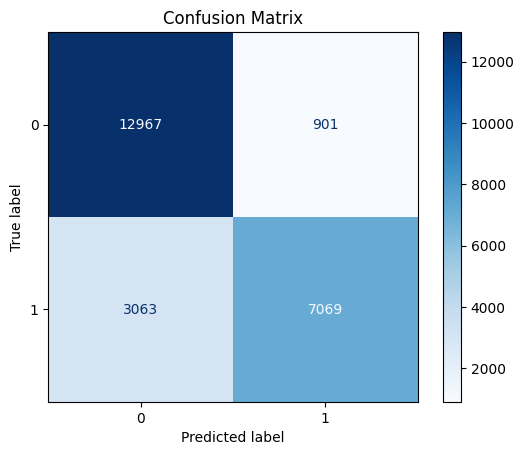

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

evaluator = Evaluator(clf)
metrics = evaluator.evaluate(X_train_tensor, y_train_tensor)

accuracy = metrics['accuracy']
roc_auc = metrics['roc_auc']
precision = metrics['precision']
recall = metrics['recall']
f1 = metrics['f1']

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = metrics['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Ewaluacja na zbiorze testującym

Accuracy: 0.78
ROC AUC: 0.82
Precision: 0.80
Recall: 0.62
F1 Score: 0.70


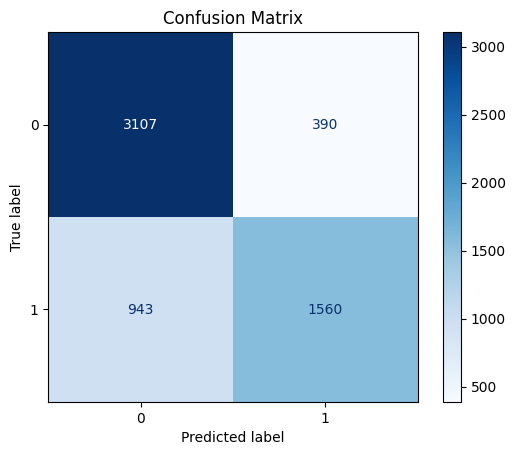

In [5]:
metrics = evaluator.evaluate(X_test_tensor, y_test_tensor)

accuracy = metrics['accuracy']
roc_auc = metrics['roc_auc']
precision = metrics['precision']
recall = metrics['recall']
f1 = metrics['f1']

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = metrics['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Save models

In [6]:
import joblib

model_path = os.path.join(current_dir, 'trained', 'nn_selected_model.joblib')

joblib.dump(clf, model_path)

['c:\\_prog\\vm_shared\\Account-Classifier\\models\\trained\\nn_selected_model.joblib']